In [1]:
# Install library for reading JPK File
%pip uninstall pyafmreader --yes
%pip install git+https://github.com/jlopezalo/pyafmreader.git

Found existing installation: pyafmreader x.x.x
Uninstalling pyafmreader-x.x.x:
  Successfully uninstalled pyafmreader-x.x.x
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-afvn2h6f
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-afvn2h6f
  Resolved https://github.com/jlopezalo/pyafmreader.git to commit 455c83796458190d25d9ff9b6a4ad8b3e40680b4
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-gaq4teq9/fasterzip_06a0d9400de84ecdaf3b0ce027ede840
  Running command git clone --filter=blob:none --quiet https://github.com/TkTech/fasterzip.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-gaq4te

In [2]:
# Install library for AFM data Rheology Analysis
%pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

Found existing installation: pyafmrheo 0.0.1
Uninstalling pyafmrheo-0.0.1:
  Successfully uninstalled pyafmrheo-0.0.1
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-ex3i5ktb
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-ex3i5ktb
  Resolved https://github.com/jlopezalo/pyafmrheo.git to commit 183aed3c3988ed0e635a9256b8eecc960e9f4f4b
  Preparing metadata (setup.py) ... done
  Created wheel for pyafmrheo: filename=pyafmrheo-0.0.1-py3-none-any.whl size=33274 sha256=5fdd5a0c26a2589570154eb81b3d957be3833324c2c3c7ca8de544bfe9ed1cad
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-0tzesemr/wheels/45/a3/5e/2d19803e3cbf5fe45f904090127b31ec30fc304c6b6e5e0f70
Successfully built pya

In [3]:
# Import libraries we will need
import numpy as np
import matplotlib.pyplot as plt

# Get file reader from library
from pyafmreader import loadfile

# Get data analysis tools
from pyafmrheo.routines.PiezoCharacterization import doPiezoCharacterization

In [4]:
# Define global variables
file_path = '/Users/javierlopez/Documents/Datasets/Data/javistuff/Gels-15122021/HeadPiezo/Calibration/force-save-2021.12.15-16.00.36.002.jpk-force'
# Shapes available: paraboloid, pyramid
indenter_shape = "pyramid"
# tip_parameter = 500 * 1e-9 # meters
tip_parameter = 35 # degrees
# Poisson ratio
poisson_ratio = 0.5
# If None it will use the deflection sensitivity from the file
deflection_sensitivity = None # m/V
# If None it will use the spring constant from the file
spring_constant = None # N/m
# General plotting params
plt.rcParams["figure.figsize"] = (10,5)

In [5]:
file = loadfile(file_path)

In [6]:
filemetadata = file.filemetadata

In [7]:
closed_loop = filemetadata['z_closed_loop']
file_deflection_sensitivity = filemetadata['defl_sens_nmbyV'] #nm/V
file_spring_constant = filemetadata['spring_const_Nbym'] #N/m
height_channel = filemetadata['height_channel_key']

if not deflection_sensitivity: deflection_sensitivity = file_deflection_sensitivity / 1e9 #m/V
if not spring_constant: spring_constant = file_spring_constant

In [8]:
param_dict = {
    'def_sens': deflection_sensitivity,
    'k': spring_constant,
    'height_channel': height_channel,
    'max_freq':np.inf
}

In [9]:
curve_idx = 0
force_curve = file.getcurve(curve_idx)
force_curve.preprocess_force_curve(param_dict['def_sens'], param_dict['height_channel'])
if filemetadata['file_type'] in ('.jpk-force', '.jpk-force-map', '.jpk-qi-data'):
    force_curve.shift_height()

In [10]:
frequencies_results, fi_results, amp_quotient_results, gamma2_results =\
    doPiezoCharacterization(force_curve, param_dict)

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


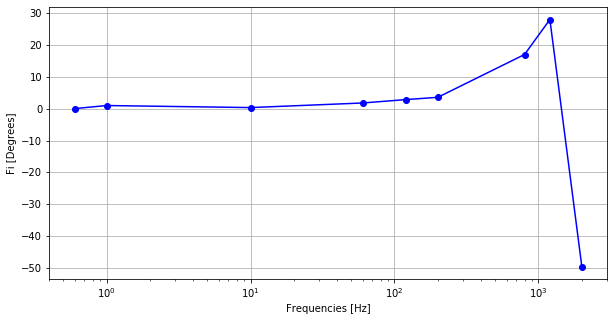

In [11]:
plt.plot(frequencies_results, fi_results, "bo-")
plt.xlabel("Frequencies [Hz]")
plt.ylabel("Fi [Degrees]")
plt.grid()
plt.xscale("log")
plt.show()

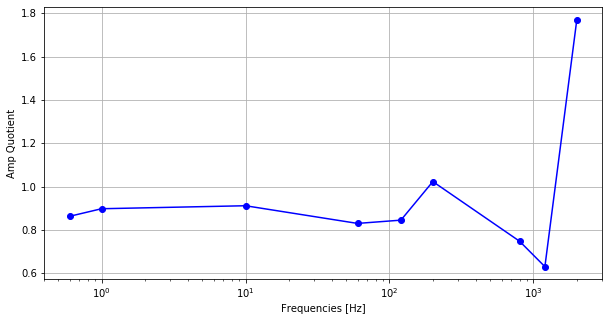

In [12]:
plt.plot(frequencies_results, amp_quotient_results, "bo-")
plt.xlabel("Frequencies [Hz]")
plt.ylabel("Amp Quotient")
plt.grid()
plt.xscale("log")
plt.show()